In [1]:
from sklearn.preprocessing import MinMaxScaler
import time
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import EarlyStopping
import os
import copy
import cv2
import torch.distributed as dist
import time
import os
import copy
from torch.utils.data import TensorDataset, DataLoader,Dataset, Sampler
import torch.utils.data as data_utils
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import multiprocessing
import pickle
import dill
from sklearn.preprocessing import StandardScaler

# Plotting
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from skimage import color
from skimage import io
import copy
from PIL import Image
import PIL
import imageio
from sklearn.decomposition import PCA

import skimage
from skimage.transform import resize
# PyTorch
import pandas as pd
from glob import iglob

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
def plot_evo(log):
    gen = log.select('gen')
    fit_min = log.select('min')
    fit_max = log.select('max')
    fit_avg = log.select('media')
    
    fig, ax = plt.subplots()
    ax.plot(gen,fit_min, 'b')
    ax.plot(gen,fit_max, 'r')
    ax.plot(gen,fit_avg, '--k')
    ax.fill_between(gen,fit_min,fit_max, alpha=0.2, facecolor='g')
    ax.set_xlabel('Generacion')
    ax.set_ylabel('Accuracy')
    ax.set_ylim([0,1])
    ax.legend(['min','max','avg'])
    plt.grid(True)
    output_dir = r'C:\Users\sergi\Desktop\AUTOQML_CODE\Brain\ConvAE_Aproximation'
    myfile = "Evolution_cae2000.pdf"
    output_path = os.path.join(output_dir,myfile)
    fig.savefig(output_path, bbox_inches='tight', dpi=250)
    
    
def plot_std(log):
    gen = log.select('gen')
    fit_std = log.select('std')
    fig, ax = plt.subplots()
    ax.plot(gen,fit_std,'^g')
    ax.set_xlabel('Generation')
    ax.set_ylabel('Std_Accuracy')
    ax.set_ylim([0,1])
    ax.legend(['std'])
    plt.grid(True)
    output_dir = r'C:\Users\sergi\Desktop\AUTOQML_CODE\Brain\ConvAE_Aproximation'
    myfile = "STD_cae2000.pdf"
    output_path = os.path.join(output_dir,myfile)
    fig.savefig(output_path, bbox_inches='tight', dpi=250)
    
def load_model():
    # loading model
    model = model_from_json(open('model_architecture_encoder_brain.json').read())
    model.load_weights('encoder_brain.h5')
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

multi


C:\Users\sergi\miniconda3\envs\pennylane_env\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\sergi\miniconda3\envs\pennylane_env\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	media   	std      	max    	min     
0  	3     	0.660131	0.0489106	0.72549	0.607843
1  	4     	0.633987	0.0805806	0.72549	0.529412
2  	4     	0.679739	0.108976 	0.784314	0.529412
3  	4     	0.673203	0.106598 	0.784314	0.529412
4  	4     	0.679739	0.113583 	0.803922	0.529412
5  	4     	0.673203	0.112449 	0.803922	0.529412
6  	4     	0.686275	0.115448 	0.803922	0.529412
7  	4     	0.686275	0.115448 	0.803922	0.529412
8  	4     	0.673203	0.0938085	0.803922	0.588235
9  	4     	0.686275	0.0891384	0.803922	0.588235
10 	4     	0.705882	0.0891384	0.803922	0.588235
Simulation finished after 16.894620180130005 seconds

Genetic-algorithm output (tumor_RESULTS_ConvAE2000_nq6_qd15.csv)
generation, individual, gates/qubit, accuracy
---------------------------------------------
0,"001000010010001000110111111010000110100010000111101001100101010110011011110101011110101001110101110101101010001010011000001001100001010011001110010110010010000100011111100101010000111110111010111001101110111001101

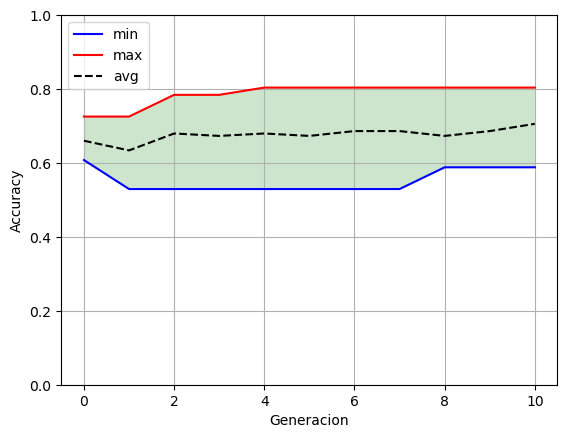

In [4]:
#Math Part
import multiprocessing
import numpy as np
import pandas as pd
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import normalize
import numpy as np
import random
import deap
from keras.models import Sequential, model_from_json
from keras.layers import Dense
from keras.utils import np_utils
from PIL import Image
import PIL
from deap import algorithms
from deap import base
from deap import benchmarks
from deap.benchmarks.tools import diversity, convergence, hypervolume
from deap import creator
from deap import tools
import imageio
from sklearn.model_selection import train_test_split
from tensorflow.keras import Model, Input, regularizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing import image
from sklearn import preprocessing 
#Graph
import matplotlib.pyplot as plt

import importlib
import circuit
import encoding
import qsvm
import fitness
import gsvm
importlib.reload(circuit)
importlib.reload(encoding)
importlib.reload(qsvm)
importlib.reload(fitness)
importlib.reload(gsvm)

import pandas as pd
import time

#- Guardo la funcion main en una funcion para poder hacer el line profiler -
def evol(output="tumor_RESULTS_ConvAE2000_nq6_qd15.csv"):
    Files = ['NO_1', 'YES_0']
    path = r"C:\Users\sergi\Desktop\AUTOQML_CODE\Brain\ConvAE_Aproximation"
    faces=[]
    label=[]
    for files in Files:
        cpath = os.path.join(path, files)
        cpath = os.path.join(cpath)
        for img in os.listdir(cpath):
            if cpath[-1] == '0':
                label.append(1)
            else:
                label.append(0)   
            img = image.load_img(os.path.join(cpath, img), target_size=(28,28,3))
            img = image.img_to_array(img)
            img = img/255.
            faces.append(img)
    all_images = np.array(faces)
    model_ae = load_model()
    images = model_ae.predict(all_images)   
    start = time.time()
    
    pop, pareto, log = gsvm.gsvm(nqubits=6, q_depth=11,X=images, y=label,
                                     mu=3,lambda_=4, ngen=10)
    print(f'Simulation finished after {time.time()-start} seconds')
    print(f'\nGenetic-algorithm output ({output})')
    print('generation, individual, gates/qubit, accuracy')
    print('---------------------------------------------')
    with open(output, "w") as f:
        for ide, ind in enumerate(pareto):
            genes=''.join(str(i) for i in list(ind))
            gates, acc = ind.fitness.values
            line = f'{ide},"{genes}",{gates},{acc}'
            f.write(line)
            f.write('\n')
            print(line)
    plot_evo(log)

evol()